In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix ,classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
print(os.listdir(r"C:\Users\hp\Downloads\movie"))

['movies.dat', 'ratings.dat', 'users.dat']


# 📁 Dataset

In [3]:
df_movies=pd.read_csv(r"C:\Users\hp\Downloads\movie\movies.dat" , sep = '::', engine='python' , encoding='ISO-8859-1')
df_movies.columns =['MovieIDs','MovieName','Category']
df_movies.head()

,MovieIDs,MovieName,Category
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [4]:
df_rate=pd.read_csv(r"C:\Users\hp\Downloads\movie\ratings.dat" , sep = '::', engine='python' , encoding='ISO-8859-1')
df_rate.columns =['ID','MovieID','Ratings','TimeStamp']
df_rate.head()

,ID,MovieID,Ratings,TimeStamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [5]:
df_user=pd.read_csv(r"C:\Users\hp\Downloads\movie\users.dat" , sep = '::', engine='python' , encoding='ISO-8859-1')
df_user.columns =['UserID','Gender','Age','Occupation','Zip-code']
df_user.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [6]:
df_movies.shape

(3882, 3)

In [7]:
df_rate.shape

(1000208, 4)

In [8]:
df_user.shape

(6039, 5)

In [9]:
df_movies.describe()

,MovieIDs
count,3882.000000
mean,1986.560793
std,1146.483260
min,2.000000
25%,983.250000
50%,2010.500000
75%,2980.750000
max,3952.000000


In [10]:
df_rate.describe()

,ID,MovieID,Ratings,TimeStamp
count,1.000208e+06,1.000208e+06,1.000208e+06,1.000208e+06
mean,3.024515e+03,1.865541e+03,3.581563e+00,9.722437e+08
std,1.728411e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [11]:
df_user.describe()

,UserID,Age,Occupation
count,6039.000000,6039.000000,6039.000000
mean,3021.000000,30.644146,8.146547
std,1743.453469,12.891387,6.329991
min,2.000000,1.000000,0.000000
25%,1511.500000,25.000000,3.000000
50%,3021.000000,25.000000,7.000000
75%,4530.500000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


In [12]:
df_movies.isna().sum()

MovieIDs     0
MovieName    0
Category     0
dtype: int64

In [13]:
df_rate.isna().sum()

ID           0
MovieID      0
Ratings      0
TimeStamp    0
dtype: int64

In [14]:
df_user.isna().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [15]:
df_movies.duplicated().sum()

0

In [16]:
df_rate.duplicated().sum()

0

In [17]:
df_user.duplicated().sum()

0

In [18]:
df = pd.concat([df_movies, df_rate,df_user], axis=1)
df.head()

,MovieIDs,MovieName,Category,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,F,50.0,9.0,55117


In [19]:
df.shape

(1000208, 12)

In [20]:
df.describe()

,MovieIDs,ID,MovieID,Ratings,TimeStamp,UserID,Age,Occupation
count,3882.000000,1.000208e+06,1.000208e+06,1.000208e+06,1.000208e+06,6039.000000,6039.000000,6039.000000
mean,1986.560793,3.024515e+03,1.865541e+03,3.581563e+00,9.722437e+08,3021.000000,30.644146,8.146547
std,1146.483260,1.728411e+03,1.096041e+03,1.117102e+00,1.215256e+07,1743.453469,12.891387,6.329991
min,2.000000,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08,2.000000,1.000000,0.000000
25%,983.250000,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08,1511.500000,25.000000,3.000000
50%,2010.500000,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08,3021.000000,25.000000,7.000000
75%,2980.750000,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08,4530.500000,35.000000,14.000000
max,3952.000000,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09,6040.000000,56.000000,20.000000


In [21]:
df.isna().sum()

MovieIDs      996326
MovieName     996326
Category      996326
ID                 0
MovieID            0
Ratings            0
TimeStamp          0
UserID        994169
Gender        994169
Age           994169
Occupation    994169
Zip-code      994169
dtype: int64

In [22]:
df.duplicated().sum()

0

# Data Visualization 📊📈📉

<Axes: xlabel='Ratings', ylabel='count'>

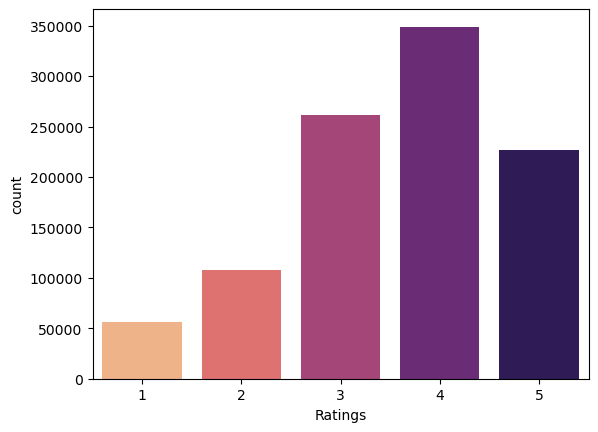

In [23]:
sns.countplot(x='Ratings',data=df,palette="magma_r")

<Axes: xlabel='Age', ylabel='count'>

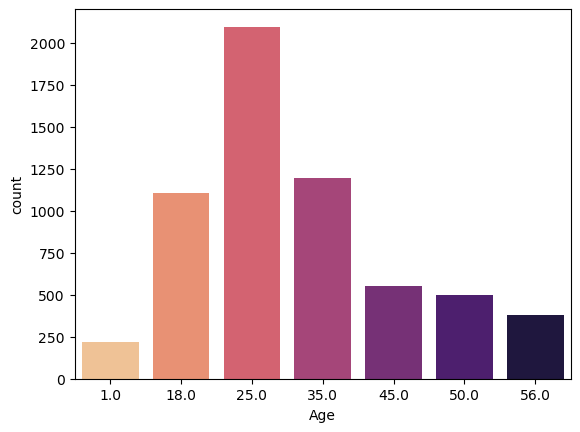

In [24]:
sns.countplot(x='Age',data=df,palette="magma_r")

Text(0.5, 0, 'Age')

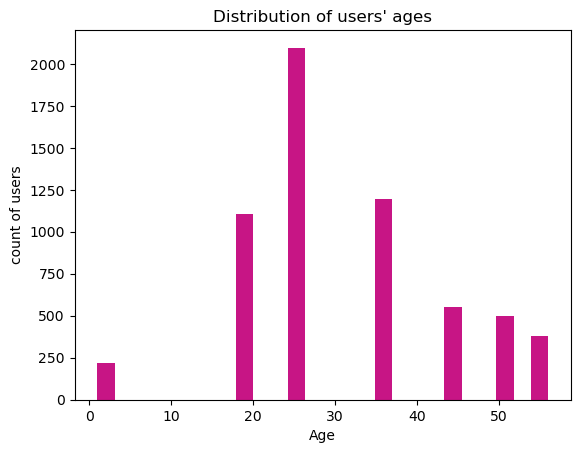

In [25]:
df.Age.plot.hist(bins=26,color='mediumvioletred')
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('Age')

<Axes: xlabel='Gender', ylabel='count'>

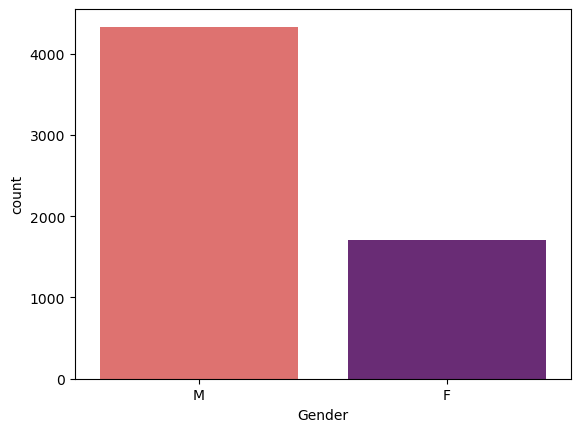

In [26]:
sns.countplot(x='Gender',data=df,palette="magma_r")

Text(0, 0.5, 'Rating')

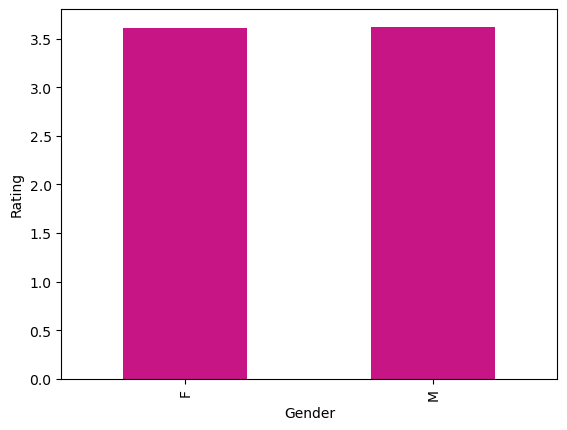

In [27]:
df.groupby("Gender").Ratings.mean().plot(kind="bar",color="mediumvioletred").set_ylabel("Rating")

Text(0, 0.5, 'Rating')

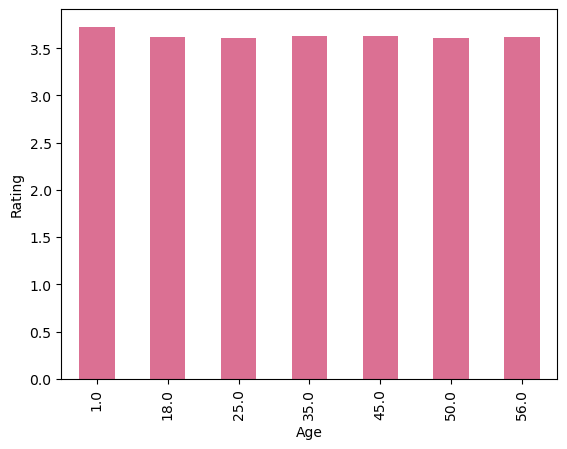

In [28]:
df.groupby("Age").Ratings.mean().plot(kind="bar",color="palevioletred").set_ylabel("Rating")

<Axes: xlabel='MovieName', ylabel='count'>

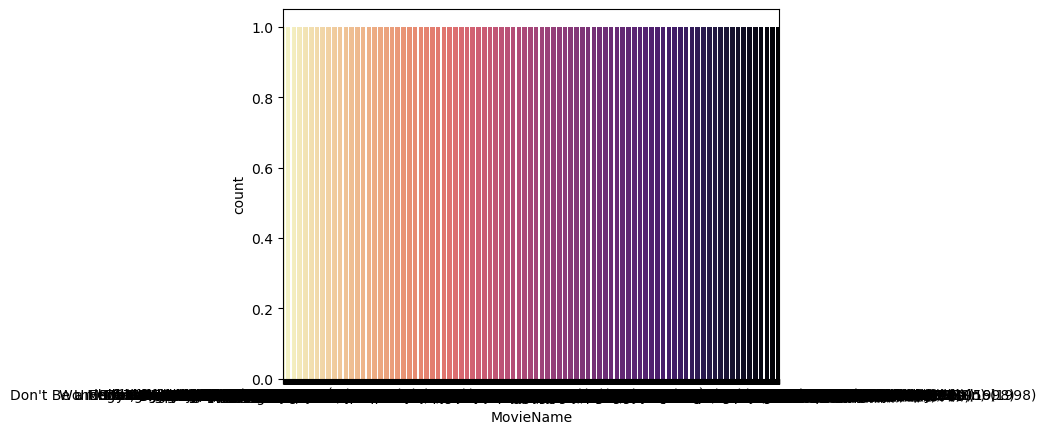

In [29]:
sns.countplot(x='MovieName',data=df,palette="magma_r")

### After analyzing this information, we should notice the following:¶

#### Maximun veiwers gave rating:4.

#### Most of the veiwers are between the age 20 to 30.

#### Most veiwers are male.

#### Average rating given by both genders are around 3.5.

#### Average rating given by veiwers based on age is around 3.5.

#### All movie names is used exaclty once.

# 🛠️ Feature Engineering 

In [30]:
# Samllest dataset is movies database , so taking first 3800 values that do not ahve any missing values and duplicate values.
dff = df[:3800]
dff.dropna(inplace=True)
dff.tail(2)

,MovieIDs,MovieName,Category,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
3798,3869.0,"Naked Gun 2 1/2: The Smell of Fear, The (1991)",Comedy,27,913,5,978129176,3800.0,M,18.0,1.0,45458
3799,3870.0,Our Town (1940),Drama,27,916,4,978129368,3801.0,M,18.0,12.0,36115


In [31]:
#split df dataframe into a test and train dataframe.
from sklearn.model_selection import train_test_split

In [32]:
df_train,df_test=train_test_split(dff,test_size=0.2)

In [33]:
#change index of test dataframe to start from 0 
df_test.index=np.arange(0,len(df_test))

In [34]:
df_test.shape

(760, 12)

In [35]:
df_test.head()

,MovieIDs,MovieName,Category,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,2956.0,Someone to Watch Over Me (1987),Action|Crime|Thriller,23,2641,3,993706741,2888.0,M,25.0,14.0,55438
1,2208.0,"Lady Vanishes, The (1938)",Comedy|Mystery|Romance|Thriller,18,1552,1,978154572,2140.0,M,45.0,14.0,46804
2,1105.0,Children of the Corn IV: The Gathering (1996),Horror,10,1203,3,979775159,1090.0,M,25.0,7.0,94105
3,242.0,Farinelli: il castrato (1994),Drama|Musical,4,2028,5,978294230,240.0,M,50.0,17.0,55113
4,1941.0,Hamlet (1948),Drama,17,1704,4,978159386,1873.0,M,35.0,7.0,02127


In [36]:
y_train=df_train["Ratings"]
x_train=df_train[['UserID', 'Age', 'Occupation']]
y_test=df_test["Ratings"]
x_test=df_test[['UserID', 'Age', 'Occupation']]

# 📈Model Training: Logistic Regression

In [37]:
LR=LogisticRegression()

In [38]:
LR.fit(x_train,y_train)

LogisticRegression()

In [39]:
LR_pred=LR.predict(x_test)

In [40]:
confusion_matrix(y_test,LR_pred)

array([[  0,   0,  11,  30,   0],
       [  0,   0,  22,  59,   0],
       [  0,   0,  57, 168,   0],
       [  0,   0,  53, 201,   0],
       [  0,   0,  29, 130,   0]], dtype=int64)

In [41]:
LR_acc=round(accuracy_score(y_test,LR_pred)* 100, 2)
LR_acc

33.95

In [42]:
print(df_test.loc[0])
print(LR_pred[0])

MovieIDs                               2956.0
MovieName     Someone to Watch Over Me (1987)
Category                Action|Crime|Thriller
ID                                         23
MovieID                                  2641
Ratings                                     3
TimeStamp                           993706741
UserID                                 2888.0
Gender                                      M
Age                                      25.0
Occupation                               14.0
Zip-code                                55438
Name: 0, dtype: object
4


# 📈 K-Nearest Neighbour (KNN)

In [43]:
KN=KNeighborsClassifier(n_neighbors=4)

In [44]:
KN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [45]:
KN_pred=KN.predict(x_test)

In [46]:
confusion_matrix(y_test,KN_pred)

array([[  3,   6,   9,  16,   7],
       [  8,  14,  31,  23,   5],
       [ 19,  35,  76,  66,  29],
       [  9,  19,  77, 101,  48],
       [  4,  11,  45,  57,  42]], dtype=int64)

In [47]:
KN_acc=round(accuracy_score(y_test,KN_pred)* 100, 2)
KN_acc

31.05

In [48]:
print(df_test.loc[0])
print(KN_pred[0])

MovieIDs                               2956.0
MovieName     Someone to Watch Over Me (1987)
Category                Action|Crime|Thriller
ID                                         23
MovieID                                  2641
Ratings                                     3
TimeStamp                           993706741
UserID                                 2888.0
Gender                                      M
Age                                      25.0
Occupation                               14.0
Zip-code                                55438
Name: 0, dtype: object
1


# 📈 Decision Tree classifier

In [49]:
DT=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5)

In [50]:
DT.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [51]:
DT_pred=DT.predict(x_test)

In [52]:
confusion_matrix(y_test,DT_pred)

array([[  0,   0,  18,  23,   0],
       [  0,   0,  42,  38,   1],
       [  0,   0,  82, 143,   0],
       [  0,   0,  50, 203,   1],
       [  0,   0,  18, 140,   1]], dtype=int64)

In [53]:
DT_acc=round(accuracy_score(y_test,DT_pred)* 100, 2)
DT_acc

37.63

In [54]:
print(df_test.loc[0])
print(DT_pred[0])

MovieIDs                               2956.0
MovieName     Someone to Watch Over Me (1987)
Category                Action|Crime|Thriller
ID                                         23
MovieID                                  2641
Ratings                                     3
TimeStamp                           993706741
UserID                                 2888.0
Gender                                      M
Age                                      25.0
Occupation                               14.0
Zip-code                                55438
Name: 0, dtype: object
3


# 📈Support Vector Classifier 

In [55]:
SV=SVC()

In [56]:
SV.fit(x_train,y_train)

SVC()

In [57]:
SV_pred=SV.predict(x_test)

In [58]:
confusion_matrix(y_test,SV_pred)

array([[  0,   0,   9,  32,   0],
       [  0,   0,  19,  62,   0],
       [  0,   0,  42, 183,   0],
       [  0,   0,  33, 221,   0],
       [  0,   0,  11, 148,   0]], dtype=int64)

In [59]:
SV_acc=round(accuracy_score(y_test,SV_pred)* 100, 2)
SV_acc

34.61

In [60]:
print(df_test.loc[0])
print(SV_pred[0])

MovieIDs                               2956.0
MovieName     Someone to Watch Over Me (1987)
Category                Action|Crime|Thriller
ID                                         23
MovieID                                  2641
Ratings                                     3
TimeStamp                           993706741
UserID                                 2888.0
Gender                                      M
Age                                      25.0
Occupation                               14.0
Zip-code                                55438
Name: 0, dtype: object
4


# 📈Naive Bayes

In [61]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
Y_pred = gaussian.predict(x_test)
NB_acc = round(accuracy_score(y_test,Y_pred) * 100, 2)
NB_acc

34.74

In [62]:
print(df_test.loc[0])
print(Y_pred[0])

MovieIDs                               2956.0
MovieName     Someone to Watch Over Me (1987)
Category                Action|Crime|Thriller
ID                                         23
MovieID                                  2641
Ratings                                     3
TimeStamp                           993706741
UserID                                 2888.0
Gender                                      M
Age                                      25.0
Occupation                               14.0
Zip-code                                55438
Name: 0, dtype: object
3


# 📈Random Forest

In [63]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
RF_pred = random_forest.predict(x_test)
RF_acc = round(accuracy_score(y_test,RF_pred) * 100, 2)
RF_acc

27.76

In [64]:
print(df_test.loc[0])
print(RF_pred[0])

MovieIDs                               2956.0
MovieName     Someone to Watch Over Me (1987)
Category                Action|Crime|Thriller
ID                                         23
MovieID                                  2641
Ratings                                     3
TimeStamp                           993706741
UserID                                 2888.0
Gender                                      M
Age                                      25.0
Occupation                               14.0
Zip-code                                55438
Name: 0, dtype: object
4


# 🧪All Model Accuracy score


In [65]:
accuracy=[LR_acc,KN_acc,DT_acc,SV_acc,NB_acc,RF_acc]

Text(0, 0.5, 'ACCURACY SCORE')

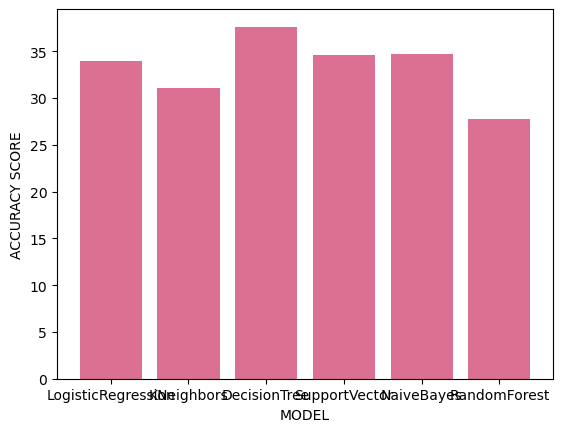

In [66]:
plt.bar(["LogisticRegression","KNeighbors","DecisionTree","SupportVector","NaiveBayes","RandomForest"],accuracy,color="palevioletred")
plt.xlabel("MODEL")
plt.ylabel("ACCURACY SCORE")